In [3]:
import pandas as pd
base = pd.read_csv('houses_price.csv')

In [13]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
# quantity of registers
print(base.count())
print(base.shape)

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64
(21613, 21)


In [18]:
# axis x is the feet square
axis_x = base.iloc[ :, 5].values # values transform in numpy array
# search value, price of houses
axis_y = base.iloc[ :, 2:3 ].values # using 2:3, I don't need do reshape to transform in matrix
print('Feet square (meters)')
print(axis_x)
print('\n Price of houses')
print(axis_y)

# reshape the axis (transform in matrix)
axis_x = axis_x.reshape(-1, 1)

print('\n\n shape')
print(axis_x.shape)
print(axis_y.shape)

Feet square (meters)
[1180 2570  770 ... 1020 1600 1020]

 Price of houses
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


 shape
(21613, 1)
(21613, 1)


In [22]:
# scaler the variables X and Y
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(axis_x)
y_scaled = scaler_y.fit_transform(axis_y)

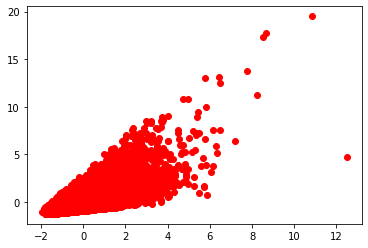

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_scaled, y_scaled, 'o', color='red')

In [31]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.1.0'

In [38]:
# Use formula of simple regression y = b0 + b1 * x

np.random.seed(1)
random_number = np.random.rand(2)

b0 = tf.Variable(random_number[0])
b1 = tf.Variable(random_number[1])

In [47]:
# training the algorithm using batch, 32 in 32
batch_size = 32
x_placeholder = tf.placeholder(tf.float64, [batch_size, 1])
y_placeholder = tf.placeholder(tf.float64, [batch_size, 1])



In [58]:
y_model = b0 + b1 * x_placeholder
error = tf.losses.mean_squared_error(y_placeholder, y_model)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
training = optimizer.minimize(error)

initialize_variables = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run( initialize_variables )
    for i in range(10000):
        indexes = np.random.randint(len(axis_x), size=batch_size)
        feed = { x_placeholder: x_scaled[indexes], y_placeholder: y_scaled[indexes] }
        sess.run(training, feed_dict=feed)
    b0_final, b1_final = sess.run([b0, b1])

In [51]:
print('Coefficients finals => ', b0_final, b1_final)

Coefficients finals =>  0.001876114245482046 0.6983495376677812


In [52]:
previsions = b0_final + b1_final * x_scaled
previsions

array([[-0.68239122],
       [ 0.37453941],
       [-0.99414774],
       ...,
       [-0.8040523 ],
       [-0.36303089],
       [-0.8040523 ]])

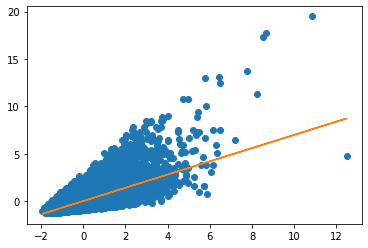

In [54]:
plt.plot(x_scaled, y_scaled, 'o')
plt.plot(x_scaled, previsions)

In [55]:
# verify errors
y1 = scaler_y.inverse_transform(y_scaled)
previsions1 = scaler_x.inverse_transform(previsions)
print('Invert the scale')
print(y1)
print(previsions1)

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
[[1453.17823169]
 [2423.88408904]
 [1166.85492124]
 ...
 [1341.44230566]
 [1746.48503751]
 [1341.44230566]]


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y1, previsions1)
mse = mean_squared_error(y1, previsions1)
print('MAE and MSE => ', mae, mse)

MAE and MSE =>  538006.518970072 423896963118.7865
